#### Actividad: Actividades de Agrupacion
#### Nombre: Luis Rodolfo Bojorquez Pineda
#### Matricula: A01250513

0. Librerias

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from minisom import MiniSom

1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

In [170]:
# Cargar los datos
data = pd.read_csv('./Archivos/country_data.csv')

In [171]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [172]:
data.country.count()
num_clusters = 4

In [173]:
# Seleccionar las características relevantes
X = data.iloc[:, 1:]

In [174]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [175]:
# K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
kmeans.fit(X_scaled)
data_kmeans = data.copy()
data_kmeans['KMeans_Labels'] = kmeans.labels_

# Estimar el número óptimo de grupos usando Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2
print("Número óptimo de grupos (Silhouette Score):", optimal_k_silhouette)

# Estimar el número óptimo de grupos usando Calinski-Harabasz Score
ch_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

optimal_k_ch = ch_scores.index(max(ch_scores)) + 2
print("Número óptimo de grupos (Calinski-Harabasz Score):", optimal_k_ch)

Número óptimo de grupos (Silhouette Score): 5
Número óptimo de grupos (Calinski-Harabasz Score): 2


2. Repita lo anterior, pero con otro método de agrupamiento que elijas. Utilizaremos agrupamiento Jerarquico.

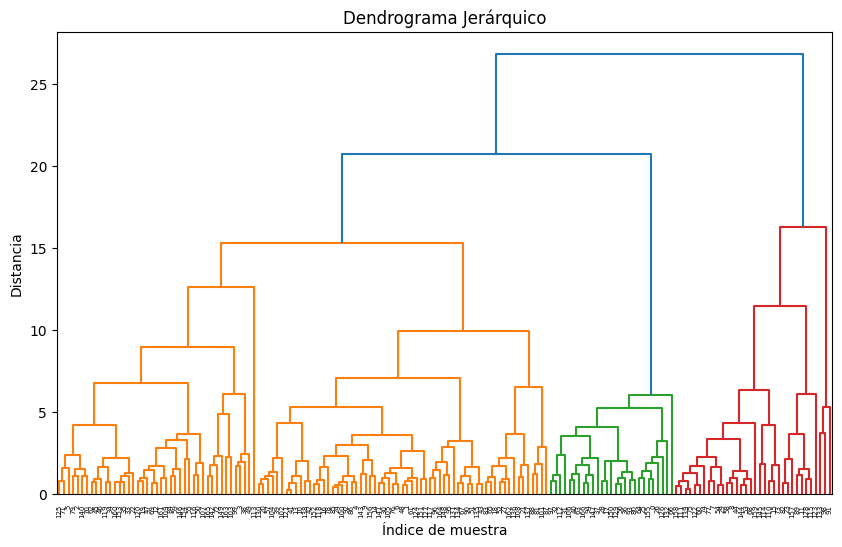

In [176]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# Seleccionar las características relevantes
X = data.iloc[:, 1:]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar agrupamiento jerárquico
linked = linkage(X_scaled, method='ward', metric='euclidean')

# Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()


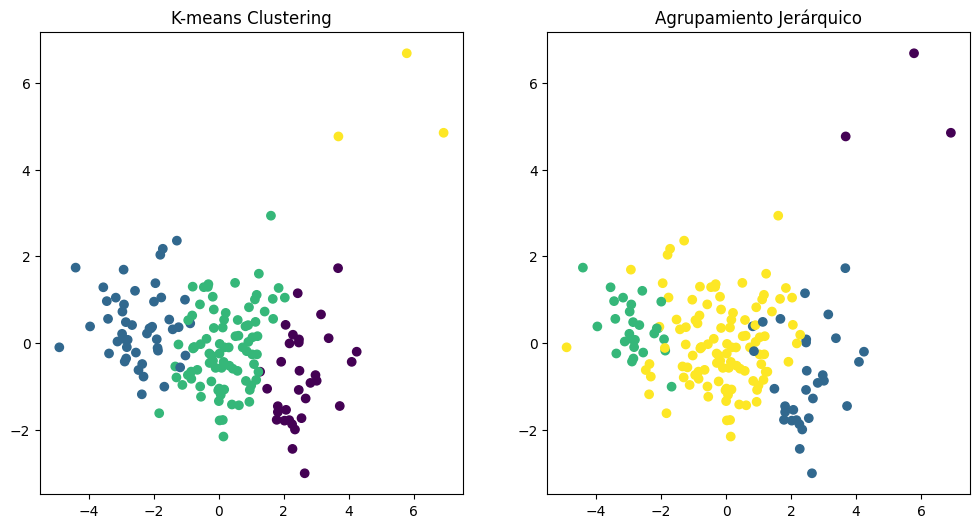

In [177]:

# Estimar el número óptimo de grupos usando el dendrograma
labels = fcluster(linked, t=num_clusters, criterion='maxclust')

# Agrega las etiquetas de clúster al DataFrame original
data_hierarchical = data.copy()
data_hierarchical['Hierarchical_Labels'] = labels

# Visualización de los resultados de K-means y Agrupamiento Jerárquico
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data_hierarchical['PCA_1'] = X_pca[:, 0]
data_hierarchical['PCA_2'] = X_pca[:, 1]
data_kmeans['PCA_1'] = X_pca[:, 0]
data_kmeans['PCA_2'] = X_pca[:, 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_kmeans['PCA_1'], data_kmeans['PCA_2'], c=data_kmeans['KMeans_Labels'], cmap='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(data_hierarchical['PCA_1'], data_hierarchical['PCA_2'], c=data_hierarchical['Hierarchical_Labels'], cmap='viridis')
plt.title('Agrupamiento Jerárquico')

plt.show()

3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Utilizaremos MiniSom:

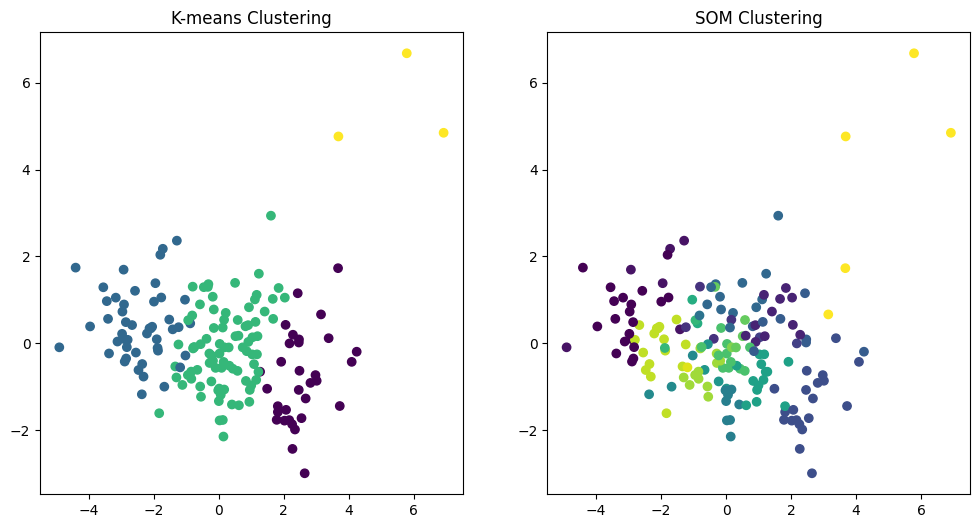

In [178]:
# SOM (Self-Organizing Maps)
som = MiniSom(6, 6, X_scaled.shape[1], sigma=0.3, learning_rate=0.5)
som.train_random(X_scaled, 100)

# Etiquetas de agrupamiento de SOM
som_labels = []
for i in range(len(X_scaled)):
    winner = som.winner(X_scaled[i])
    som_labels.append(winner)

# Convierte las coordenadas SOM en etiquetas únicas
unique_labels = set(som_labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
data_som = data.copy()
data_som['SOM_Labels'] = [label_mapping[label] for label in som_labels]
data_som['PCA_1'] = X_pca[:, 0]
data_som['PCA_2'] = X_pca[:, 1]

# Visualización de los resultados de K-means y SOM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_kmeans['PCA_1'], data_kmeans['PCA_2'], c=data_kmeans['KMeans_Labels'], cmap='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(data_som['PCA_1'], data_som['PCA_2'], c=data_som['SOM_Labels'], cmap='viridis')
plt.title('SOM Clustering')

plt.show()

In [179]:
data_som = data_som.drop(['country'], axis=1)
data_kmeans = data_kmeans.drop(['country'], axis=1)
data_hierarchical = data_hierarchical.drop(['country'], axis=1)


4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

In [180]:
grouped_data = data_kmeans.groupby('KMeans_Labels')
summary_stats = grouped_data.mean()


In [181]:
summary_stats

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PCA_1,PCA_2
KMeans_Labels,,,,,,,,,,,
0,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000,2.528099,-0.819815
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,-2.434620,0.411276
2,21.690588,41.073988,6.197059,47.914893,12671.411765,7.609341,72.871765,2.300706,6519.552941,0.201733,-0.110509
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,5.460225,5.432473


In [182]:
grouped_data = data_hierarchical.groupby('Hierarchical_Labels')
summary_stats = grouped_data.mean()

In [183]:
summary_stats

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PCA_1,PCA_2
Hierarchical_Labels,,,,,,,,,,,
1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,5.460225,5.432473
2,6.138710,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355,2.441239,-0.790478
3,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889,-2.823319,0.356783
4,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925,-0.149335,-0.013450


In [184]:
grouped_data = data_som.groupby('SOM_Labels')
summary_stats = grouped_data.mean()

In [185]:
summary_stats

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PCA_1,PCA_2
SOM_Labels,,,,,,,,,,,
0,115.585000,25.391000,7.423500,46.495000,1448.150000,8.346000,54.550000,5.506500,624.300000,-2.993113,0.630694
1,97.500000,61.150000,3.795000,42.333333,11443.333333,34.583333,62.166667,5.203333,5941.666667,-2.373205,1.307368
2,9.172727,64.036364,7.303636,65.436364,20327.272727,1.123273,75.572727,1.658182,12532.727273,1.457431,0.599159
3,37.975000,33.600000,10.522500,77.775000,4080.000000,5.140000,65.900000,3.800000,2330.000000,-0.566553,0.578867
4,6.950000,47.850000,6.000000,58.200000,26500.000000,1.725000,78.350000,1.775000,21500.000000,1.604015,0.066074
5,4.310000,36.375000,10.546000,34.055000,40605.000000,1.570000,81.015000,1.817500,46450.000000,2.549174,-1.388343
6,11.437500,65.562500,3.356250,39.125000,62475.000000,12.727500,76.825000,2.302500,31312.500000,2.008556,0.289986
7,27.283333,66.016667,4.960833,67.675000,9769.166667,4.228333,71.491667,2.408333,4585.500000,0.331768,1.185552
8,29.200000,46.600000,5.250000,52.700000,2950.000000,2.620000,63.000000,3.500000,2970.000000,-0.820631,0.639570


K-Means:

* Grupo 0: Este grupo se caracteriza por tener bajas tasas de mortalidad infantil, alta esperanza de vida, alto gasto en salud y un alto PIB per cápita.
* Grupo 1: En contraste, el Grupo 1 muestra altas tasas de mortalidad infantil, inflación y un bajo PIB per cápita.
* Grupo 2: Este grupo destaca por tener un PIB per cápita excepcionalmente alto, tasas de mortalidad infantil y fertilidad bajas, y una excelente atención médica.
* Grupo 3: Aquí, los países muestran tasas de mortalidad infantil y fertilidad moderadas, junto con ingresos medios y un sistema de atención médica razonable.

Hierarchical:

* Grupo 1: Similar al Grupo 2 de K-Means, este grupo se caracteriza por países con un alto PIB per cápita, bajas tasas de mortalidad infantil y fertilidad, y un alto gasto en salud.
* Grupo 2: Este grupo incluye países con ingresos medios y bajas tasas de mortalidad infantil y fertilidad.
* Grupo 3: En este grupo, los países enfrentan desafíos significativos, con bajas tasas de ingresos, altas tasas de mortalidad infantil y fertilidad, y un bajo gasto en salud.
* Grupo 4: Estos países muestran características intermedias, con tasas de mortalidad infantil y fertilidad moderadas y un desarrollo socioeconómico equilibrado.

SOM:

* En el SOM, se observa una mayor segmentación con 22 grupos. Algunos de estos grupos presentan características muy específicas, como países con altos ingresos y bajas tasas de fertilidad, mientras que otros tienen un alto PIB per cápita y tasas de mortalidad infantil moderadas.
* Se destaca un grupo con tasas de inflación excepcionalmente altas y otro con tasas de inflación cercanas a cero, lo que indica una variabilidad significativa en la estabilidad económica entre los países.
* Además, se identifican países con un alto PIB per cápita y tasas de mortalidad infantil extremadamente bajas, lo que sugiere un alto nivel de desarrollo humano.

En conclusión, los resultados del agrupamiento han proporcionado una visión más detallada de la diversidad en las características socioeconómicas de los países. Estos grupos no solo siguen patrones esperados, como la relación entre el PIB per cápita y la mortalidad infantil, sino que también revelan patrones nuevos y sutiles, como la variabilidad en las tasas de inflación y la estabilidad económica.